In [ ]:
#datasets links
#!kaggle datasets download -d preetviradiya/brian-tumor-dataset
#!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
#!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

# now we are using the first dataset with around 4500 images

In [ ]:
!mkdir ~/.kaggle
!pip install kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [ ]:

!kaggle datasets download -d preetviradiya/brian-tumor-dataset

 98% 105M/107M [00:01<00:00, 100MB/s]  
100% 107M/107M [00:01<00:00, 108MB/s]


In [ ]:
!unzip '/content/brian-tumor-dataset.zip'

Archive:  /content/brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: B

In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras import utils, callbacks
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99))

In [ ]:
train = gen.flow_from_directory("/content/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (256,256),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [ ]:
val = gen.flow_from_directory("/content/Brain Tumor Data Set/Brain Tumor Data Set/",
                               target_size = (256,256),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")

Found 919 images belonging to 2 classes.


In [ ]:
classes = val.class_indices

In [ ]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(256,256,3)))
#model.add(Conv2D(filters=8,kernel_size=3, activation="relu", padding="same"))
#model.add(MaxPool2D())
model.add(Conv2D(filters=8,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(train,verbose=1, epochs=10, validation_data=(val))

Epoch 1/10
15/15 [==============================] - 75s 5s/step - loss: 1.9356 - accuracy: 0.5599 - val_loss: 0.8590 - val_accuracy: 0.6703
Epoch 2/10
15/15 [==============================] - 71s 5s/step - loss: 0.6838 - accuracy: 0.6490 - val_loss: 0.6101 - val_accuracy: 0.6529
Epoch 3/10
15/15 [==============================] - 78s 5s/step - loss: 0.4920 - accuracy: 0.7805 - val_loss: 0.4602 - val_accuracy: 0.8020
Epoch 4/10
15/15 [==============================] - 71s 5s/step - loss: 0.3823 - accuracy: 0.8449 - val_loss: 0.3612 - val_accuracy: 0.8477
Epoch 5/10
15/15 [==============================] - 71s 5s/step - loss: 0.3123 - accuracy: 0.8878 - val_loss: 0.3292 - val_accuracy: 0.8770
Epoch 6/10
15/15 [==============================] - 71s 5s/step - loss: 0.2596 - accuracy: 0.9133 - val_loss: 0.2604 - val_accuracy: 0.8988
Epoch 7/10
15/15 [==============================] - 71s 5s/step - loss: 0.2200 - accuracy: 0.9326 - val_loss: 0.2404 - val_accuracy: 0.9184
Epoch 8/10
15/15 [==

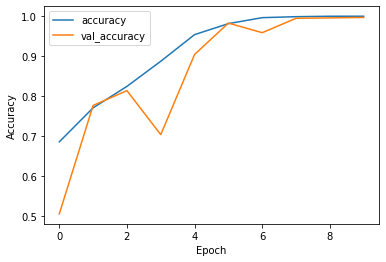

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/model1.h5')

In [ ]:
import cv2
cancer_path1 = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1010).jpg'
healthy_path1='/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (10).jpg'
healthy_path2 = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1015).jpg'
img = cv2.imread(healthy_path2)


img = cv2.resize(img, (256, 256))

img = img.astype('float32') / 255.0

img = img.reshape(1, 256, 256, 3)

pred = model.predict(img)
print(pred)
if pred[0][0] > 0.4:
  print('No Cancer')
else:
  print('Cancer')

1/1 [==============================] - 0s 94ms/step
[[0.9494688]]
No Cancer
